In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from datetime import timedelta

In [3]:
merged_data = pd.read_csv("data/merged_data.csv")

In [4]:
merged_data["Starting Week"] = pd.to_datetime(merged_data["Starting Week"])

In [5]:
merged_data.drop(["growth_driver_l1", "Year_x", "Year_y"], axis=1, inplace=True)


In [6]:
merged_data

,growth_driver_l2,growth_driver_l3,growth_driver_l4,growth_driver_l5,metric,Starting Week,investment (in pound),execution,UK L'Oreal Paris Haircare Offline Average Price (in pound),UK L'Oreal Paris Haircare Online Average Price (in pound),UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%),UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound),UK L'Oreal Paris Haircare Total Offline Sellout Units,UK L'Oreal Paris Haircare Total Online Sellout Value (in pound),UK L'Oreal Paris Haircare Total Online Sellout Units
0,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,2022-01-03,107.438017,537.216943,2.323822,3.242071,0.37,1583364.9,681362.5,362750.18,111888.4
1,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,2022-01-10,0.000000,0.000000,2.328649,2.978819,0.42,1753588.2,753049.7,385263.71,129334.4
2,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,2022-01-17,0.000000,0.000000,2.378280,3.014039,0.43,1690696.8,710890.7,359523.06,119282.8
3,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,2022-01-24,28484.999998,142432.121596,2.396989,3.077403,0.86,1748572.8,729487.2,357843.85,116281.1
4,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,2022-01-31,19172.915190,95869.369418,2.394615,3.306272,0.78,1768055.9,738346.7,386416.94,116873.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,shopper_experience,shopper_experience,testers_and_merchandising,testers_and_merchandising,units,2023-11-27,0.000000,0.000000,3.067400,3.771592,0.91,2472870.4,806178.1,511228.38,135547.1
2024,shopper_experience,shopper_experience,testers_and_merchandising,testers_and_merchandising,units,2023-12-04,0.000000,0.000000,3.039699,3.784533,0.81,2464104.5,810641.0,483836.99,127845.9
2025,shopper_experience,shopper_experience,testers_and_merchandising,testers_and_merchandising,units,2023-12-11,3381.443000,193.700000,3.057034,3.836532,0.81,2686708.7,878861.1,502614.45,131007.5
2026,shopper_experience,shopper_experience,testers_and_merchandising,testers_and_merchandising,units,2023-12-18,0.000000,0.000000,3.176955,3.939211,0.86,3397529.2,1069429.4,463530.08,117670.8


In [7]:
merged_data.columns

Index(['growth_driver_l2', 'growth_driver_l3', 'growth_driver_l4',
       'growth_driver_l5', 'metric', 'Starting Week', 'investment (in pound)',
       'execution',
       'UK L'Oreal Paris Haircare Offline Average Price (in pound)',
       'UK L'Oreal Paris Haircare Online Average Price (in pound)',
       'UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%)',
       'UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound)',
       'UK L'Oreal Paris Haircare Total Offline Sellout Units',
       'UK L'Oreal Paris Haircare Total Online Sellout Value (in pound)',
       'UK L'Oreal Paris Haircare Total Online Sellout Units'],
      dtype='object')

In [8]:
# Filtering offline data
offline_data = merged_data[
    [
        "Starting Week",
        "UK L'Oreal Paris Haircare Total Offline Sellout Units",
        "UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound)",
        "UK L'Oreal Paris Haircare Offline Average Price (in pound)",
        "UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%)",
        "growth_driver_l2",
        "growth_driver_l3",
        "growth_driver_l4",
        "growth_driver_l5",
        "metric",
        "execution",
        # "investment (in pound)",
    ]
]


In [9]:
X = offline_data.drop(
    [
        "UK L'Oreal Paris Haircare Total Offline Sellout Units",
        "UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound)",
    ],
    axis=1,
)
y = offline_data["UK L'Oreal Paris Haircare Total Offline Sellout Units"]

In [10]:
X["Starting Week"]

0      2022-01-03
1      2022-01-10
2      2022-01-17
3      2022-01-24
4      2022-01-31
          ...    
2023   2023-11-27
2024   2023-12-04
2025   2023-12-11
2026   2023-12-18
2027   2023-12-25
Name: Starting Week, Length: 2028, dtype: datetime64[ns]

# Feature Engineering

In [11]:
offline_data["Starting Week"].max()

Timestamp('2023-12-25 00:00:00')

In [12]:
uk_holidays = holidays.UnitedKingdom(years=[2022, 2023])


# Function to check if the starting week contains a holiday
def is_holiday_in_week(week_start_date):
    # Iterate through all days in the week (assuming week_start_date is Monday)
    for day in range(7):
        current_date = week_start_date + timedelta(days=day)
        if current_date in uk_holidays:
            return True
    return False

In [13]:
# Apply this function to create the 'Holiday' column
offline_data["Holiday"] = (
    offline_data["Starting Week"].apply(is_holiday_in_week).astype(int)
)


C:\Users\ameya\AppData\Local\Temp\ipykernel_23140\4154573693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offline_data["Holiday"] = (


In [14]:
offline_data

,Starting Week,UK L'Oreal Paris Haircare Total Offline Sellout Units,UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound),UK L'Oreal Paris Haircare Offline Average Price (in pound),UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%),growth_driver_l2,growth_driver_l3,growth_driver_l4,growth_driver_l5,metric,execution,Holiday
0,2022-01-03,681362.5,1583364.9,2.323822,0.37,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,537.216943,1
1,2022-01-10,753049.7,1753588.2,2.328649,0.42,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,0.000000,0
2,2022-01-17,710890.7,1690696.8,2.378280,0.43,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,0.000000,0
3,2022-01-24,729487.2,1748572.8,2.396989,0.86,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,142432.121596,0
4,2022-01-31,738346.7,1768055.9,2.394615,0.78,consumer_engagement,advocacy_media,influencer_management,influencer_management,engagements,95869.369418,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2023-11-27,806178.1,2472870.4,3.067400,0.91,shopper_experience,shopper_experience,testers_and_merchandising,testers_and_merchandising,units,0.000000,0
2024,2023-12-04,810641.0,2464104.5,3.039699,0.81,shopper_experience,shopper_experience,testers_and_merchandising,testers_and_merchandising,units,0.000000,0
2025,2023-12-11,878861.1,2686708.7,3.057034,0.81,shopper_experience,shopper_experience,testers_and_merchandising,testers_and_merchandising,units,193.700000,0
2026,2023-12-18,1069429.4,3397529.2,3.176955,0.86,shopper_experience,shopper_experience,testers_and_merchandising,testers_and_merchandising,units,0.000000,0


In [15]:
# Create a unique channel identifier by combining all growth drivers
offline_data["channel"] = (
    offline_data["growth_driver_l2"]
    + "_"
    + offline_data["growth_driver_l3"]
    + "_"
    + offline_data["growth_driver_l4"]
    + "_"
    + offline_data["growth_driver_l5"]
)


C:\Users\ameya\AppData\Local\Temp\ipykernel_23140\2513851545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offline_data["channel"] = (


In [16]:
offline_data.rename(columns={"investment (in pound)": "investment"}, inplace=True)

C:\Users\ameya\AppData\Local\Temp\ipykernel_23140\3759003540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offline_data.rename(columns={"investment (in pound)": "investment"}, inplace=True)


In [17]:
# Pivot execution values to have one column per channel #, "investment"
execution_per_channel = offline_data.pivot_table(
    index="Starting Week", columns="channel", values="execution", aggfunc="sum"
).fillna(0)


In [18]:
execution_per_channel.reset_index(inplace=True)


In [19]:
execution_per_channel.head()

channel,Starting Week,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,consumer_engagement_paid_media_online_video_content_platforms_google_video,consumer_engagement_paid_media_online_video_content_platforms_youtube,consumer_engagement_paid_media_paid_search_awarenessconsideration_google,consumer_engagement_paid_media_paid_search_transaction_amazon,consumer_engagement_paid_media_paid_search_transaction_citrus,...,consumer_engagement_paid_media_social_media_awarenessconsideration_meta,consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest,consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok,consumer_engagement_paid_media_social_media_transaction_meta,consumer_engagement_paid_media_social_media_transaction_meta_collab_ads,consumer_engagement_paid_media_social_media_transaction_tesco,consumer_engagement_paid_media_social_media_transaction_the_hut_group,consumer_engagement_paid_media_social_media_transaction_tik_tok,consumer_engagement_paid_media_traditional_tv_linear,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising
0,2022-01-03,537.216943,0.00,193246.3,0.0,0.0,0.0,4067.7,1468912.9,0.0,...,1289454.4,0.0,0.0,0.0,1507673.7,0.0,0.0,0.0,0.00,330.571429
1,2022-01-10,0.000000,0.00,343567.9,0.0,0.0,0.0,3716.7,2474498.0,0.0,...,2106572.0,0.0,0.0,0.0,1662391.9,0.0,0.0,0.0,0.00,261.151429
2,2022-01-17,0.000000,0.00,448357.0,0.0,0.0,0.0,4264.0,2691219.7,0.0,...,2869640.8,0.0,0.0,0.0,1781321.1,0.0,0.0,0.0,0.00,340.488571
3,2022-01-24,142432.121596,815102.08,626307.5,0.0,0.0,0.0,4633.2,1940061.5,0.0,...,11263612.1,0.0,0.0,0.0,1750936.2,0.0,0.0,0.0,58.63,421.908314
4,2022-01-31,95869.369418,679251.82,619993.4,0.0,0.0,0.0,2134.6,2349322.3,0.0,...,15033348.2,0.0,0.0,0.0,1959865.7,0.0,0.0,0.0,100.49,513.410486


In [20]:
# execution_per_channel.columns = [
#     f"{col[0]}_{col[1]}" if col[1] else col[0] for col in execution_per_channel.columns.to_list()
# ]

# execution_per_channel.head()

In [21]:
# Merge back with the main dataset
offline_data = offline_data.drop(
    columns=[
        "execution",
        "growth_driver_l2",
        "growth_driver_l3",
        "growth_driver_l4",
        "growth_driver_l5",
    ]
)
offline_data = offline_data.merge(execution_per_channel, on="Starting Week", how="left")


In [22]:
offline_data.drop(columns=["metric", "channel"], inplace=True)


In [23]:
offline_data

,Starting Week,UK L'Oreal Paris Haircare Total Offline Sellout Units,UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound),UK L'Oreal Paris Haircare Offline Average Price (in pound),UK L'Oreal Paris Haircare Total Weigheted Promotion Distribution (%),Holiday,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,...,consumer_engagement_paid_media_social_media_awarenessconsideration_meta,consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest,consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok,consumer_engagement_paid_media_social_media_transaction_meta,consumer_engagement_paid_media_social_media_transaction_meta_collab_ads,consumer_engagement_paid_media_social_media_transaction_tesco,consumer_engagement_paid_media_social_media_transaction_the_hut_group,consumer_engagement_paid_media_social_media_transaction_tik_tok,consumer_engagement_paid_media_traditional_tv_linear,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising
0,2022-01-03,681362.5,1583364.9,2.323822,0.37,1,537.216943,0.00,193246.3,0.000,...,1289454.4,0.0,0.0,0.0,1507673.7,0.00,0.0,0.0,0.00,330.571429
1,2022-01-10,753049.7,1753588.2,2.328649,0.42,0,0.000000,0.00,343567.9,0.000,...,2106572.0,0.0,0.0,0.0,1662391.9,0.00,0.0,0.0,0.00,261.151429
2,2022-01-17,710890.7,1690696.8,2.378280,0.43,0,0.000000,0.00,448357.0,0.000,...,2869640.8,0.0,0.0,0.0,1781321.1,0.00,0.0,0.0,0.00,340.488571
3,2022-01-24,729487.2,1748572.8,2.396989,0.86,0,142432.121596,815102.08,626307.5,0.000,...,11263612.1,0.0,0.0,0.0,1750936.2,0.00,0.0,0.0,58.63,421.908314
4,2022-01-31,738346.7,1768055.9,2.394615,0.78,0,95869.369418,679251.82,619993.4,0.000,...,15033348.2,0.0,0.0,0.0,1959865.7,0.00,0.0,0.0,100.49,513.410486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2023-11-27,806178.1,2472870.4,3.067400,0.91,0,0.000000,0.00,3740070.1,2208424.400,...,0.0,0.0,0.0,0.0,0.0,830281.40,0.0,0.0,0.00,0.000000
2024,2023-12-04,810641.0,2464104.5,3.039699,0.81,0,0.000000,0.00,3669885.7,2208424.400,...,0.0,0.0,0.0,0.0,0.0,3229658.25,0.0,0.0,0.00,0.000000
2025,2023-12-11,878861.1,2686708.7,3.057034,0.81,0,0.000000,0.00,1885674.7,2208424.400,...,0.0,0.0,0.0,0.0,0.0,3229658.25,0.0,0.0,0.00,193.700000
2026,2023-12-18,1069429.4,3397529.2,3.176955,0.86,0,0.000000,0.00,0.0,2208424.400,...,0.0,0.0,0.0,0.0,0.0,3229658.25,0.0,0.0,0.00,0.000000


In [24]:
# count
duplicate_count = offline_data.duplicated().sum()
print(f"Number of duplicate rows in offline_data: {duplicate_count}")

Number of duplicate rows in offline_data: 1924


In [25]:
offline_data.drop_duplicates(inplace=True)

In [26]:
# offline_data.to_csv("data/offline_data_pivoted.csv")

In [27]:
offline_data.drop(
    columns="UK L'Oreal Paris Haircare Total Offline Sellout Value (in pound)",
    inplace=True,
)

In [28]:
offline_data.columns = [
    col.lower().replace(" ", "_").replace("'", "").replace("(", "").replace(")", "")
    for col in offline_data.columns
]

In [29]:
offline_data.columns

Index(['starting_week', 'uk_loreal_paris_haircare_total_offline_sellout_units',
       'uk_loreal_paris_haircare_offline_average_price_in_pound',
       'uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%',
       'holiday',
       'consumer_engagement_advocacy_media_influencer_management_influencer_management',
       'consumer_engagement_paid_media_digital_tv_bvod',
       'consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail',
       'consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco',
       'consumer_engagement_paid_media_online_video_content_platforms_google_video',
       'consumer_engagement_paid_media_online_video_content_platforms_youtube',
       'consumer_engagement_paid_media_paid_search_awarenessconsideration_google',
       'consumer_engagement_paid_media_paid_search_transaction_amazon',
       'consumer_engagement_paid_media_paid_search_transaction_citrus',
       'consumer_engagement_paid_media_paid_search

In [30]:
# Week Number

offline_data["week_number"] = offline_data["starting_week"].dt.isocalendar().week

# Month

offline_data["month"] = offline_data["starting_week"].dt.month

# Year

offline_data["year"] = offline_data["starting_week"].dt.year


In [31]:
offline_data.sort_values(by="starting_week", inplace=True)

In [32]:
offline_data

,starting_week,uk_loreal_paris_haircare_total_offline_sellout_units,uk_loreal_paris_haircare_offline_average_price_in_pound,uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%,holiday,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,consumer_engagement_paid_media_online_video_content_platforms_google_video,...,consumer_engagement_paid_media_social_media_transaction_meta,consumer_engagement_paid_media_social_media_transaction_meta_collab_ads,consumer_engagement_paid_media_social_media_transaction_tesco,consumer_engagement_paid_media_social_media_transaction_the_hut_group,consumer_engagement_paid_media_social_media_transaction_tik_tok,consumer_engagement_paid_media_traditional_tv_linear,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising,week_number,month,year
0,2022-01-03,681362.5,2.323822,0.37,1,537.216943,0.00,193246.3,0.000,0.0,...,0.0,1507673.7,0.00,0.0,0.0,0.00,330.571429,1,1,2022
1,2022-01-10,753049.7,2.328649,0.42,0,0.000000,0.00,343567.9,0.000,0.0,...,0.0,1662391.9,0.00,0.0,0.0,0.00,261.151429,2,1,2022
2,2022-01-17,710890.7,2.378280,0.43,0,0.000000,0.00,448357.0,0.000,0.0,...,0.0,1781321.1,0.00,0.0,0.0,0.00,340.488571,3,1,2022
3,2022-01-24,729487.2,2.396989,0.86,0,142432.121596,815102.08,626307.5,0.000,0.0,...,0.0,1750936.2,0.00,0.0,0.0,58.63,421.908314,4,1,2022
4,2022-01-31,738346.7,2.394615,0.78,0,95869.369418,679251.82,619993.4,0.000,0.0,...,0.0,1959865.7,0.00,0.0,0.0,100.49,513.410486,5,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,806178.1,3.067400,0.91,0,0.000000,0.00,3740070.1,2208424.400,0.0,...,0.0,0.0,830281.40,0.0,0.0,0.00,0.000000,48,11,2023
100,2023-12-04,810641.0,3.039699,0.81,0,0.000000,0.00,3669885.7,2208424.400,0.0,...,0.0,0.0,3229658.25,0.0,0.0,0.00,0.000000,49,12,2023
101,2023-12-11,878861.1,3.057034,0.81,0,0.000000,0.00,1885674.7,2208424.400,0.0,...,0.0,0.0,3229658.25,0.0,0.0,0.00,193.700000,50,12,2023
102,2023-12-18,1069429.4,3.176955,0.86,0,0.000000,0.00,0.0,2208424.400,0.0,...,0.0,0.0,3229658.25,0.0,0.0,0.00,0.000000,51,12,2023


In [33]:
features = list(offline_data.columns)
target = "uk_loreal_paris_haircare_total_offline_sellout_units"
features.remove(target)

In [34]:
# Add lags for the target variable

lagged_features = offline_data.copy()
for i in range(1, 3):
    lagged_features[f"{target}_lag_{i}"] = offline_data[target].shift(i)

lagged_features.dropna(inplace=True)

lagged_features

,starting_week,uk_loreal_paris_haircare_total_offline_sellout_units,uk_loreal_paris_haircare_offline_average_price_in_pound,uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%,holiday,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,consumer_engagement_paid_media_online_video_content_platforms_google_video,...,consumer_engagement_paid_media_social_media_transaction_tesco,consumer_engagement_paid_media_social_media_transaction_the_hut_group,consumer_engagement_paid_media_social_media_transaction_tik_tok,consumer_engagement_paid_media_traditional_tv_linear,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising,week_number,month,year,uk_loreal_paris_haircare_total_offline_sellout_units_lag_1,uk_loreal_paris_haircare_total_offline_sellout_units_lag_2
2,2022-01-17,710890.7,2.378280,0.43,0,0.000000,0.00,448357.0,0.000,0.0,...,0.00,0.0,0.0,0.00,340.488571,3,1,2022,753049.7,681362.5
3,2022-01-24,729487.2,2.396989,0.86,0,142432.121596,815102.08,626307.5,0.000,0.0,...,0.00,0.0,0.0,58.63,421.908314,4,1,2022,710890.7,753049.7
4,2022-01-31,738346.7,2.394615,0.78,0,95869.369418,679251.82,619993.4,0.000,0.0,...,0.00,0.0,0.0,100.49,513.410486,5,1,2022,729487.2,710890.7
5,2022-02-07,721747.0,2.427983,0.72,0,114872.705000,1086802.86,515611.2,0.000,0.0,...,0.00,0.0,0.0,85.93,351.959400,6,2,2022,738346.7,729487.2
6,2022-02-14,687971.7,2.426661,0.72,0,38475.998653,407551.04,6170598.2,0.000,0.0,...,0.00,0.0,0.0,61.75,282.539400,7,2,2022,721747.0,738346.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,806178.1,3.067400,0.91,0,0.000000,0.00,3740070.1,2208424.400,0.0,...,830281.40,0.0,0.0,0.00,0.000000,48,11,2023,826727.2,814798.4
100,2023-12-04,810641.0,3.039699,0.81,0,0.000000,0.00,3669885.7,2208424.400,0.0,...,3229658.25,0.0,0.0,0.00,0.000000,49,12,2023,806178.1,826727.2
101,2023-12-11,878861.1,3.057034,0.81,0,0.000000,0.00,1885674.7,2208424.400,0.0,...,3229658.25,0.0,0.0,0.00,193.700000,50,12,2023,810641.0,806178.1
102,2023-12-18,1069429.4,3.176955,0.86,0,0.000000,0.00,0.0,2208424.400,0.0,...,3229658.25,0.0,0.0,0.00,0.000000,51,12,2023,878861.1,810641.0


In [35]:
lagged_features.columns

Index(['starting_week', 'uk_loreal_paris_haircare_total_offline_sellout_units',
       'uk_loreal_paris_haircare_offline_average_price_in_pound',
       'uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%',
       'holiday',
       'consumer_engagement_advocacy_media_influencer_management_influencer_management',
       'consumer_engagement_paid_media_digital_tv_bvod',
       'consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail',
       'consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco',
       'consumer_engagement_paid_media_online_video_content_platforms_google_video',
       'consumer_engagement_paid_media_online_video_content_platforms_youtube',
       'consumer_engagement_paid_media_paid_search_awarenessconsideration_google',
       'consumer_engagement_paid_media_paid_search_transaction_amazon',
       'consumer_engagement_paid_media_paid_search_transaction_citrus',
       'consumer_engagement_paid_media_paid_search

In [36]:
paid_media_vars = [
    "consumer_engagement_advocacy_media_influencer_management_influencer_management",
    "consumer_engagement_paid_media_digital_tv_bvod",
    "consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail",
    "consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco",
    "consumer_engagement_paid_media_online_video_content_platforms_google_video",
    "consumer_engagement_paid_media_online_video_content_platforms_youtube",
    "consumer_engagement_paid_media_paid_search_awarenessconsideration_google",
    "consumer_engagement_paid_media_paid_search_transaction_amazon",
    "consumer_engagement_paid_media_paid_search_transaction_citrus",
    "consumer_engagement_paid_media_paid_search_transaction_criteo",
    "consumer_engagement_paid_media_social_media_awarenessconsideration_meta",
    "consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest",
    "consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok",
    "consumer_engagement_paid_media_social_media_transaction_meta",
    "consumer_engagement_paid_media_social_media_transaction_meta_collab_ads",
    "consumer_engagement_paid_media_social_media_transaction_tesco",
    "consumer_engagement_paid_media_social_media_transaction_the_hut_group",
    "consumer_engagement_paid_media_social_media_transaction_tik_tok",
    "consumer_engagement_paid_media_traditional_tv_linear",
    "shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising",
]

In [37]:
MMM_CATEGORIES = {
    "tv": [
        # Traditional + digital/connected TV
        "consumer_engagement_paid_media_traditional_tv_linear",  # formerly linear_grps
        "consumer_engagement_paid_media_digital_tv_bvod",  # formerly bvod_impressions
    ],
    "display": [
        # Banner or display-like environments (incl. programmatic & retail media)
        "consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail",  # formerly amazon_retail_impressions
        "consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco",  # formerly tesco_impressions
        "consumer_engagement_paid_media_paid_search_transaction_criteo",  # formerly google_video_impressions
        "consumer_engagement_paid_media_online_video_content_platforms_youtube",
        "consumer_engagement_paid_media_online_video_content_platforms_google_video",  # formerly youtube_impressions
    ],
    "search": [
        # Paid search (branded or generic keywords)
        "consumer_engagement_paid_media_paid_search_awarenessconsideration_google",  # formerly google_impressions
        "consumer_engagement_paid_media_paid_search_transaction_amazon",  # formerly amazon_impressions
        "consumer_engagement_paid_media_paid_search_transaction_citrus",  # formerly citrus_impressions
    ],
    "social": [
        # All social media platforms + influencer
        "consumer_engagement_paid_media_social_media_transaction_meta",
        "consumer_engagement_paid_media_social_media_awarenessconsideration_meta",  # formerly meta_impressions
        "consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest",  # formerly pinterest_impressions
        "consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok",
        "consumer_engagement_paid_media_social_media_transaction_tik_tok",  # formerly tik_tok_impressions
        "consumer_engagement_paid_media_social_media_transaction_meta_collab_ads",  # formerly meta_collab_ads_impressions
        "consumer_engagement_paid_media_social_media_transaction_the_hut_group",  # formerly the_hut_group_impressions
        "consumer_engagement_advocacy_media_influencer_management_influencer_management",
        "consumer_engagement_paid_media_social_media_transaction_tesco",
    ],
    "other": [
        # In-store marketing, testers, merchandising
        "shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising"
    ],
}


In [38]:
# Decay rates
decay_rates = {
    "tv": [0.2, 0.5],
    "display": [0.6, 0.8],
    "search": [0.3, 0.6],
    "social": [0.6, 0.8],
    "other": [0.4, 0.5],
}

In [39]:
# Adstock for paid media variables
def adstock_transform(x, decay):
    if len(x) == 0:
        return x
    adstocked = x.copy()
    for i in range(1, len(x)):
        adstocked.iloc[i] = adstocked.iloc[i] + decay * adstocked.iloc[i - 1]
    return adstocked

In [40]:
for category, variables in MMM_CATEGORIES.items():
    for var in variables:
        lagged_features[f"{var}"] = adstock_transform(
            lagged_features[var], decay_rates[category][0]
        )


In [41]:
lagged_features

,starting_week,uk_loreal_paris_haircare_total_offline_sellout_units,uk_loreal_paris_haircare_offline_average_price_in_pound,uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%,holiday,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,consumer_engagement_paid_media_online_video_content_platforms_google_video,...,consumer_engagement_paid_media_social_media_transaction_tesco,consumer_engagement_paid_media_social_media_transaction_the_hut_group,consumer_engagement_paid_media_social_media_transaction_tik_tok,consumer_engagement_paid_media_traditional_tv_linear,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising,week_number,month,year,uk_loreal_paris_haircare_total_offline_sellout_units_lag_1,uk_loreal_paris_haircare_total_offline_sellout_units_lag_2
2,2022-01-17,710890.7,2.378280,0.43,0,0.000000,0.000000e+00,4.483570e+05,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,340.488571,3,1,2022,753049.7,681362.5
3,2022-01-24,729487.2,2.396989,0.86,0,142432.121596,8.151021e+05,8.953217e+05,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,58.630000,558.103743,4,1,2022,710890.7,753049.7
4,2022-01-31,738346.7,2.394615,0.78,0,181328.642376,8.422722e+05,1.157186e+06,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,112.216000,736.651983,5,1,2022,729487.2,710890.7
5,2022-02-07,721747.0,2.427983,0.72,0,223669.890426,1.255257e+06,1.209923e+06,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,108.373200,646.620193,6,2,2022,738346.7,729487.2
6,2022-02-14,687971.7,2.426661,0.72,0,172677.932909,6.586025e+05,6.896552e+06,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,83.424640,541.187477,7,2,2022,721747.0,738346.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,806178.1,3.067400,0.91,0,389.016696,2.290998e+02,5.742986e+06,5.825366e+06,8.297070e-13,...,1.627352e+06,1447.224840,30.925829,0.011774,479.654670,48,11,2023,826727.2,814798.4
100,2023-12-04,810641.0,3.039699,0.81,0,233.410018,4.581997e+01,7.115678e+06,5.703644e+06,4.978242e-13,...,4.206069e+06,868.334904,18.555498,0.002355,191.861868,49,12,2023,806178.1,826727.2
101,2023-12-11,878861.1,3.057034,0.81,0,140.046011,9.163993e+00,6.155081e+06,5.630611e+06,2.986945e-13,...,5.753300e+06,521.000943,11.133299,0.000471,270.444747,50,12,2023,810641.0,806178.1
102,2023-12-18,1069429.4,3.176955,0.86,0,84.027606,1.832799e+00,3.693049e+06,5.586791e+06,1.792167e-13,...,6.681638e+06,312.600566,6.679979,0.000094,108.177899,51,12,2023,878861.1,810641.0


In [42]:
# Beta values for S-curve transformation
beta_values = {
    "tv": [0.3, 0.6],  # TV typically has a slower diminishing return
    "display": [0.5, 0.7, 1.0],  # Display can have varying diminishing returns
    "search": [0.5, 0.7, 1.0],  # Search is often more sensitive to diminishing returns
    "social": [0.6, 0.8, 1.0],  # Social media platforms tend to have varying effects
    "other": [
        0.4,
        0.6,
    ],  # For other media types that don't fit into the typical categories
}


In [43]:
# Hill function (S-curve) transformation
def s_curve(x, alpha, beta):
    return (x**beta) / (alpha**beta + x**beta)

In [44]:
for category, variables in MMM_CATEGORIES.items():
    for var in variables:
        alpha = lagged_features[var].max()
        lagged_features[f"{var}"] = s_curve(
            lagged_features[var], alpha, beta_values[category][0]
        )

In [45]:
lagged_features

,starting_week,uk_loreal_paris_haircare_total_offline_sellout_units,uk_loreal_paris_haircare_offline_average_price_in_pound,uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%,holiday,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,consumer_engagement_paid_media_online_video_content_platforms_google_video,...,consumer_engagement_paid_media_social_media_transaction_tesco,consumer_engagement_paid_media_social_media_transaction_the_hut_group,consumer_engagement_paid_media_social_media_transaction_tik_tok,consumer_engagement_paid_media_traditional_tv_linear,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising,week_number,month,year,uk_loreal_paris_haircare_total_offline_sellout_units_lag_1,uk_loreal_paris_haircare_total_offline_sellout_units_lag_2
2,2022-01-17,710890.7,2.378280,0.43,0,0.000000,0.000000,0.127883,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.270529,3,1,2022,753049.7,681362.5
3,2022-01-24,729487.2,2.396989,0.86,0,0.204673,0.423740,0.171645,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.439959,0.311251,4,1,2022,710890.7,753049.7
4,2022-01-31,738346.7,2.394615,0.78,0,0.229264,0.426143,0.190659,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.488358,0.335537,5,1,2022,729487.2,710890.7
5,2022-02-07,721747.0,2.427983,0.72,0,0.252267,0.455640,0.194121,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.485747,0.324013,6,2,2022,738346.7,729487.2
6,2022-02-14,687971.7,2.426661,0.72,0,0.224123,0.408203,0.365118,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.466172,0.308618,7,2,2022,721747.0,738346.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,806178.1,3.067400,0.91,0,0.007398,0.059496,0.344176,0.488901,5.850625e-10,...,0.289979,0.004652,0.001125,0.057581,0.298413,48,11,2023,826727.2,814798.4
100,2023-12-04,810641.0,3.039699,0.81,0,0.005456,0.037567,0.368751,0.486263,4.531875e-10,...,0.419277,0.003428,0.000828,0.036330,0.227693,49,12,2023,806178.1,826727.2
101,2023-12-11,878861.1,3.057034,0.81,0,0.004021,0.023518,0.352039,0.484654,3.510375e-10,...,0.465605,0.002525,0.000610,0.022733,0.252737,50,12,2023,810641.0,806178.1
102,2023-12-18,1069429.4,3.176955,0.86,0,0.002963,0.014643,0.296191,0.483678,2.719125e-10,...,0.487992,0.001860,0.000449,0.014150,0.189912,51,12,2023,878861.1,810641.0


In [46]:
# lag all media variables
for category, variables in MMM_CATEGORIES.items():
    for var in variables:
        for i in range(1, 3):
            lagged_features[f"{var}_lag_{i}"] = lagged_features[var].shift(i)

In [47]:
lagged_features.dropna(inplace=True)

In [48]:
lagged_features

,starting_week,uk_loreal_paris_haircare_total_offline_sellout_units,uk_loreal_paris_haircare_offline_average_price_in_pound,uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%,holiday,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,consumer_engagement_paid_media_online_video_content_platforms_google_video,...,consumer_engagement_paid_media_social_media_transaction_meta_collab_ads_lag_1,consumer_engagement_paid_media_social_media_transaction_meta_collab_ads_lag_2,consumer_engagement_paid_media_social_media_transaction_the_hut_group_lag_1,consumer_engagement_paid_media_social_media_transaction_the_hut_group_lag_2,consumer_engagement_advocacy_media_influencer_management_influencer_management_lag_1,consumer_engagement_advocacy_media_influencer_management_influencer_management_lag_2,consumer_engagement_paid_media_social_media_transaction_tesco_lag_1,consumer_engagement_paid_media_social_media_transaction_tesco_lag_2,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising_lag_1,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising_lag_2
4,2022-01-31,738346.7,2.394615,0.78,0,0.229264,0.426143,0.190659,0.000000,0.000000e+00,...,0.308479,0.252974,0.000000,0.000000,0.204673,0.000000,0.000000,0.000000,0.311251,0.270529
5,2022-02-07,721747.0,2.427983,0.72,0,0.252267,0.455640,0.194121,0.000000,0.000000e+00,...,0.342515,0.308479,0.000000,0.000000,0.229264,0.204673,0.000000,0.000000,0.335537,0.311251
6,2022-02-14,687971.7,2.426661,0.72,0,0.224123,0.408203,0.365118,0.000000,0.000000e+00,...,0.347608,0.342515,0.000000,0.000000,0.252267,0.229264,0.000000,0.000000,0.324013,0.335537
7,2022-02-21,686506.6,2.583091,0.48,0,0.186352,0.298546,0.455627,0.000000,2.178377e-01,...,0.341667,0.347608,0.000000,0.000000,0.224123,0.252267,0.000000,0.000000,0.308618,0.324013
8,2022-02-28,676341.9,2.651524,0.46,0,0.144255,0.207994,0.427213,0.000000,2.615334e-01,...,0.339028,0.341667,0.000000,0.000000,0.186352,0.224123,0.000000,0.000000,0.318073,0.308618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,806178.1,3.067400,0.91,0,0.007398,0.059496,0.344176,0.488901,5.850625e-10,...,0.068826,0.091258,0.006310,0.008554,0.010025,0.013571,0.265563,0.214291,0.380282,0.402816
100,2023-12-04,810641.0,3.039699,0.81,0,0.005456,0.037567,0.368751,0.486263,4.531875e-10,...,0.051595,0.068826,0.004652,0.006310,0.007398,0.010025,0.289979,0.265563,0.298413,0.380282
101,2023-12-11,878861.1,3.057034,0.81,0,0.004021,0.023518,0.352039,0.484654,3.510375e-10,...,0.038499,0.051595,0.003428,0.004652,0.005456,0.007398,0.419277,0.289979,0.227693,0.298413
102,2023-12-18,1069429.4,3.176955,0.86,0,0.002963,0.014643,0.296191,0.483678,2.719125e-10,...,0.028627,0.038499,0.002525,0.003428,0.004021,0.005456,0.465605,0.419277,0.252737,0.227693


# Modeling

In [49]:
X = lagged_features.drop(
    columns=["uk_loreal_paris_haircare_total_offline_sellout_units", "starting_week"]
)
y = lagged_features["uk_loreal_paris_haircare_total_offline_sellout_units"]

In [64]:
X = X[
    [
        "consumer_engagement_advocacy_media_influencer_management_influencer_management",
        "consumer_engagement_paid_media_digital_tv_bvod",
        "consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail",
        "consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco",
        "consumer_engagement_paid_media_online_video_content_platforms_google_video",
        "consumer_engagement_paid_media_online_video_content_platforms_youtube",
        "consumer_engagement_paid_media_paid_search_awarenessconsideration_google",
        "consumer_engagement_paid_media_paid_search_transaction_amazon",
        "consumer_engagement_paid_media_paid_search_transaction_citrus",
        "consumer_engagement_paid_media_paid_search_transaction_criteo",
        "consumer_engagement_paid_media_social_media_awarenessconsideration_meta",
        "consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest",
        "consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok",
        "consumer_engagement_paid_media_social_media_transaction_meta",
        "consumer_engagement_paid_media_social_media_transaction_meta_collab_ads",
        "consumer_engagement_paid_media_social_media_transaction_tesco",
        "consumer_engagement_paid_media_social_media_transaction_the_hut_group",
        "consumer_engagement_paid_media_social_media_transaction_tik_tok",
        "consumer_engagement_paid_media_traditional_tv_linear",
        "shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising",
        "uk_loreal_paris_haircare_total_offline_sellout_units_lag_1",
        # "uk_loreal_paris_haircare_total_offline_sellout_units_lag_2",
        # "consumer_engagement_paid_media_traditional_tv_linear_lag_1",
        # "consumer_engagement_paid_media_traditional_tv_linear_lag_2",
        # "consumer_engagement_paid_media_digital_tv_bvod_lag_1",
        # "consumer_engagement_paid_media_digital_tv_bvod_lag_2",
        # "consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail_lag_1",
        # "consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail_lag_2",
        # "consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco_lag_1",
        # "consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco_lag_2",
        # "consumer_engagement_paid_media_paid_search_transaction_criteo_lag_1",
        # "consumer_engagement_paid_media_paid_search_transaction_criteo_lag_2",
        # "consumer_engagement_paid_media_online_video_content_platforms_youtube_lag_1",
        # "consumer_engagement_paid_media_online_video_content_platforms_youtube_lag_2",
        # "consumer_engagement_paid_media_online_video_content_platforms_google_video_lag_1",
        # "consumer_engagement_paid_media_online_video_content_platforms_google_video_lag_2",
        # "consumer_engagement_paid_media_paid_search_awarenessconsideration_google_lag_1",
        # "consumer_engagement_paid_media_paid_search_awarenessconsideration_google_lag_2",
        # "consumer_engagement_paid_media_paid_search_transaction_amazon_lag_1",
        # "consumer_engagement_paid_media_paid_search_transaction_amazon_lag_2",
        # "consumer_engagement_paid_media_paid_search_transaction_citrus_lag_1",
        # "consumer_engagement_paid_media_paid_search_transaction_citrus_lag_2",
        # "consumer_engagement_paid_media_social_media_transaction_meta_lag_1",
        # "consumer_engagement_paid_media_social_media_transaction_meta_lag_2",
        # "consumer_engagement_paid_media_social_media_awarenessconsideration_meta_lag_1",
        # "consumer_engagement_paid_media_social_media_awarenessconsideration_meta_lag_2",
        # "consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest_lag_1",
        # "consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest_lag_2",
        # "consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok_lag_1",
        # "consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok_lag_2",
        # "consumer_engagement_paid_media_social_media_transaction_tik_tok_lag_1",
        # "consumer_engagement_paid_media_social_media_transaction_tik_tok_lag_2",
        # "consumer_engagement_paid_media_social_media_transaction_meta_collab_ads_lag_1",
        # "consumer_engagement_paid_media_social_media_transaction_meta_collab_ads_lag_2",
        # "consumer_engagement_paid_media_social_media_transaction_the_hut_group_lag_1",
        # "consumer_engagement_paid_media_social_media_transaction_the_hut_group_lag_2",
        # "consumer_engagement_advocacy_media_influencer_management_influencer_management_lag_1",
        # "consumer_engagement_advocacy_media_influencer_management_influencer_management_lag_2",
        # "consumer_engagement_paid_media_social_media_transaction_tesco_lag_1",
        # "consumer_engagement_paid_media_social_media_transaction_tesco_lag_2",
        # "shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising_lag_1",
        # "shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising_lag_2",
        "holiday",
        # "week_number",
        # "month",
        # "year",
        "uk_loreal_paris_haircare_offline_average_price_in_pound",
        "uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%",
    ]
]

In [65]:
X

,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,consumer_engagement_paid_media_online_video_content_platforms_google_video,consumer_engagement_paid_media_online_video_content_platforms_youtube,consumer_engagement_paid_media_paid_search_awarenessconsideration_google,consumer_engagement_paid_media_paid_search_transaction_amazon,consumer_engagement_paid_media_paid_search_transaction_citrus,consumer_engagement_paid_media_paid_search_transaction_criteo,...,consumer_engagement_paid_media_social_media_transaction_meta_collab_ads,consumer_engagement_paid_media_social_media_transaction_tesco,consumer_engagement_paid_media_social_media_transaction_the_hut_group,consumer_engagement_paid_media_social_media_transaction_tik_tok,consumer_engagement_paid_media_traditional_tv_linear,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising,uk_loreal_paris_haircare_total_offline_sellout_units_lag_1,holiday,uk_loreal_paris_haircare_offline_average_price_in_pound,uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%
4,0.229264,0.426143,0.190659,0.000000,0.000000e+00,0.000000,0.029246,0.368889,0.000000,0.349465,...,0.342515,0.000000,0.000000,0.000000,0.488358,0.335537,729487.2,0.0,2.394615,0.78
5,0.252267,0.455640,0.194121,0.000000,0.000000e+00,0.000000,0.024187,0.377837,0.000000,0.314348,...,0.347608,0.000000,0.000000,0.000000,0.485747,0.324013,738346.7,0.0,2.427983,0.72
6,0.224123,0.408203,0.365118,0.000000,0.000000e+00,0.224641,0.023121,0.377031,0.000000,0.282889,...,0.341667,0.000000,0.000000,0.000000,0.466172,0.308618,721747.0,0.0,2.426661,0.72
7,0.186352,0.298546,0.455627,0.000000,2.178377e-01,0.372979,0.026184,0.410525,0.000000,0.255826,...,0.339028,0.000000,0.000000,0.000000,0.350156,0.318073,687971.7,0.0,2.583091,0.48
8,0.144255,0.207994,0.427213,0.000000,2.615334e-01,0.395671,0.030220,0.412355,0.000000,0.310109,...,0.321106,0.000000,0.000000,0.000000,0.249518,0.321277,686506.6,0.0,2.651524,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.007398,0.059496,0.344176,0.488901,5.850625e-10,0.176558,0.086103,0.422300,0.226225,0.292560,...,0.051595,0.289979,0.004652,0.001125,0.057581,0.298413,826727.2,0.0,3.067400,0.91
100,0.005456,0.037567,0.368751,0.486263,4.531875e-10,0.142429,0.090289,0.342699,0.211836,0.296860,...,0.038499,0.419277,0.003428,0.000828,0.036330,0.227693,806178.1,0.0,3.039699,0.81
101,0.004021,0.023518,0.352039,0.484654,3.510375e-10,0.113985,0.084102,0.242626,0.192141,0.295989,...,0.028627,0.465605,0.002525,0.000610,0.022733,0.252737,810641.0,0.0,3.057034,0.81
102,0.002963,0.014643,0.296191,0.483678,2.719125e-10,0.090620,0.081677,0.187023,0.184827,0.307874,...,0.021231,0.487992,0.001860,0.000449,0.014150,0.189912,878861.1,0.0,3.176955,0.86


In [52]:
# linear regression with statsmodels
import statsmodels.api as sm
from scipy.optimize import minimize

In [66]:
def constrained_regression(X, y, n_execution_vars):
    """
    Run regression with proper non-negative constraints for execution variables.

    Args:
        X: Feature matrix without constant term
        y: Target variable
        n_execution_vars: Number of execution variables (to constrain)
    """

    def objective(params):
        return 0.5 * np.sum((y - np.dot(X_const, params)) ** 2)

    def gradient(params):
        return -np.dot(X_const.T, (y - np.dot(X_const, params)))

    # Add constant term to X inside the function
    X_const = sm.add_constant(X)

    # Initial guess using OLS
    initial_model = sm.OLS(y, X_const).fit()
    initial_params = initial_model.params

    # Set up bounds for parameters:
    # - Constant term: no constraints
    # - Execution variables: non-negative
    # - Other variables: no constraints
    bounds = [(None, None)]  # Constant term
    bounds.extend([(0, None) for _ in range(n_execution_vars)])  # Execution vars
    bounds.extend(
        [(None, None) for _ in range(X_const.shape[1] - n_execution_vars - 1)]
    )  # Other vars

    # Run optimization with bounds
    result = minimize(
        objective,
        initial_params,
        method="L-BFGS-B",
        jac=gradient,
        bounds=bounds,
        options={"maxiter": 1000},
    )

    # Apply the optimized coefficients to the X matrix
    final_params = result.x

    return final_params

In [67]:
class ConstrainedOLS:
    def __init__(self, n_execution_vars):
        self.n_execution_vars = n_execution_vars
        self.model = None
        self.params = None
        self.X_const = None
        self.y = None

    def fit(self, X, y):
        """
        Fits an OLS model with non-negative constraints on execution variables.
        """
        X_const = sm.add_constant(X)
        self.X_const = X_const
        self.y = y

        def objective(params):
            return 0.5 * np.sum((y - np.dot(X_const, params)) ** 2)

        def gradient(params):
            return -np.dot(X_const.T, (y - np.dot(X_const, params)))

        # Initial guess using OLS
        initial_model = sm.OLS(y, X_const).fit()
        initial_params = initial_model.params

        # Set up bounds: first param (intercept) unconstrained, execution vars >= 0
        bounds = [(None, None)]  # Intercept
        bounds += [(0, None)] * self.n_execution_vars  # Non-negative execution vars
        bounds += [(None, None)] * (
            X_const.shape[1] - self.n_execution_vars - 1
        )  # Other vars

        # Run optimization
        result = minimize(
            objective, initial_params, method="L-BFGS-B", jac=gradient, bounds=bounds
        )

        self.params = result.x
        return self

    def summary(self):
        """
        Returns a statsmodels-like summary.
        """
        if self.params is None:
            raise ValueError("Model not fitted yet.")

        # Fit an OLS model to get the summary, but replace params with constrained ones
        ols_model = sm.OLS(self.y, self.X_const).fit()
        ols_model.params[:] = self.params  # Override params with constrained ones
        return ols_model.summary()

In [68]:
n_execution_vars = len(X.columns) - 3
X = X.astype(float)

In [69]:
constrained_model = ConstrainedOLS(n_execution_vars).fit(X, y)

In [70]:
constrained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                             
================================================================================================================
Dep. Variable:     uk_loreal_paris_haircare_total_offline_sellout_units   R-squared:                       0.080
Model:                                                              OLS   Adj. R-squared:                 -0.215
Method:                                                   Least Squares   F-statistic:                    0.2700
Date:                                                  Thu, 06 Feb 2025   Prob (F-statistic):               1.00
Time:                                                          16:07:38   Log-Likelihood:                -1278.0
No. Observations:                                                   100   AIC:                             2606.
Df Residuals:                                                        75   BIC:                             2671.
Df Model:                                                            24                                         
Covariance Type:                                              nonrobust                                         
=============================================================================================================================================================
                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       1.12e+06   3.98e+05      2.819      0.006    3.29e+05    1.91e+06
consumer_engagement_advocacy_media_influencer_management_influencer_management                     0   1.99e+05          0      1.000   -3.96e+05    3.96e+05
consumer_engagement_paid_media_digital_tv_bvod                                                     0   1.02e+05          0      1.000   -2.03e+05    2.03e+05
consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail            2.502e+05   2.47e+05      1.013      0.314   -2.42e+05    7.42e+05
consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco                    3.393e+05   1.86e+05      1.820      0.073    -3.2e+04    7.11e+05
consumer_engagement_paid_media_online_video_content_platforms_google_video                  2.42e+05   1.63e+05      1.483      0.142    -8.3e+04    5.67e+05
consumer_engagement_paid_media_online_video_content_platforms_youtube                              0    1.3e+05          0      1.000    -2.6e+05     2.6e+05
consumer_engagement_paid_media_paid_search_awarenessconsideration_google                           0   3.26e+05          0      1.000    -6.5e+05     6.5e+05
consumer_engagement_paid_media_paid_search_transaction_amazon                                      0   2.93e+05          0      1.000   -5.83e+05    5.83e+05
consumer_engagement_paid_media_paid_search_transaction_citrus                              3.229e+05   1.57e+05      2.052      0.044    9351.412    6.36e+05
consumer_engagement_paid_media_paid_search_transaction_criteo                              8704.3745   2.63e+05      0.033      0.974   -5.16e+05    5.33e+05
consumer_engagement_paid_media_social_media_awarenessconsideration_meta                    1.767e+05   2.25e+05      0.784      0.435   -2.72e+05    6.26e+05
consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest                1.03e+05   2.79e+05      0.369      0.713   -4.53e+05    6.59e+05
consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok                 2.468e+05   1.33e+05      1.853      0.068   -1.85e+04    5.12e+05
consumer_engagement_pai

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [72]:
vif = vif.sort_values(by="VIF", ascending=False)

In [73]:
vif.to_csv("vif.csv")

In [32]:
features = list(X_train.columns)
features.remove("const")
target = "uk_loreal_paris_haircare_total_offline_sellout_units"

In [33]:
features

['uk_loreal_paris_haircare_offline_average_price_in_pound',
 'uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%',
 'holiday',
 'consumer_engagement_advocacy_media_influencer_management_influencer_management',
 'consumer_engagement_paid_media_digital_tv_bvod',
 'consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail',
 'consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco',
 'consumer_engagement_paid_media_online_video_content_platforms_google_video',
 'consumer_engagement_paid_media_online_video_content_platforms_youtube',
 'consumer_engagement_paid_media_paid_search_awarenessconsideration_google',
 'consumer_engagement_paid_media_paid_search_transaction_amazon',
 'consumer_engagement_paid_media_paid_search_transaction_citrus',
 'consumer_engagement_paid_media_paid_search_transaction_criteo',
 'consumer_engagement_paid_media_social_media_awarenessconsideration_meta',
 'consumer_engagement_paid_media_social_media_awarenessconsi

In [34]:
target

'uk_loreal_paris_haircare_total_offline_sellout_units'

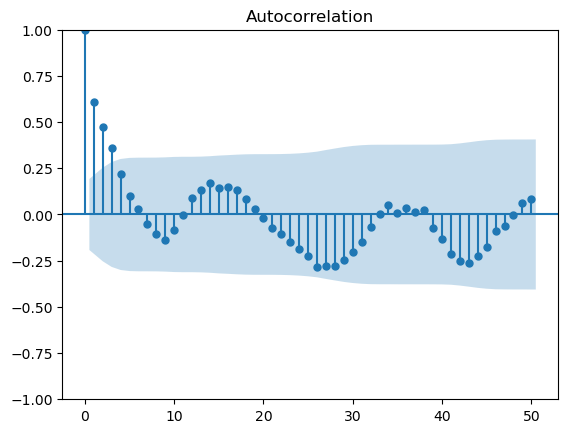

In [35]:
# autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(offline_data[target], lags=50)
plt.show()

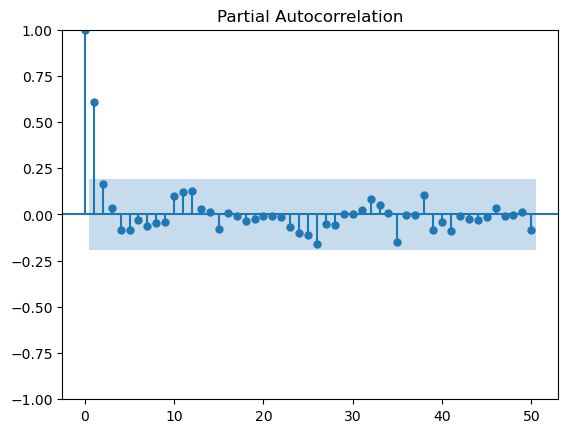

In [36]:
# partial autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(offline_data[target], lags=50)
plt.show()

In [37]:
# Create lagged features
lagged_features = offline_data.copy()
for i in range(1, 3):
    lagged_features[f"{target}_lag_{i}"] = offline_data[target].shift(i)

lagged_features.dropna(inplace=True)

lagged_features

,starting_week,uk_loreal_paris_haircare_total_offline_sellout_units,uk_loreal_paris_haircare_offline_average_price_in_pound,uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%,holiday,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,consumer_engagement_paid_media_online_video_content_platforms_google_video,...,consumer_engagement_paid_media_social_media_transaction_tesco,consumer_engagement_paid_media_social_media_transaction_the_hut_group,consumer_engagement_paid_media_social_media_transaction_tik_tok,consumer_engagement_paid_media_traditional_tv_linear,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising,week_number,month,year,uk_loreal_paris_haircare_total_offline_sellout_units_lag_1,uk_loreal_paris_haircare_total_offline_sellout_units_lag_2
2,2022-01-17,710890.7,2.378280,0.43,0,0.000000,0.00,448357.0,0.000,0.0,...,0.00,0.0,0.0,0.00,340.488571,3,1,2022,753049.7,681362.5
3,2022-01-24,729487.2,2.396989,0.86,0,142432.121596,815102.08,626307.5,0.000,0.0,...,0.00,0.0,0.0,58.63,421.908314,4,1,2022,710890.7,753049.7
4,2022-01-31,738346.7,2.394615,0.78,0,95869.369418,679251.82,619993.4,0.000,0.0,...,0.00,0.0,0.0,100.49,513.410486,5,1,2022,729487.2,710890.7
5,2022-02-07,721747.0,2.427983,0.72,0,114872.705000,1086802.86,515611.2,0.000,0.0,...,0.00,0.0,0.0,85.93,351.959400,6,2,2022,738346.7,729487.2
6,2022-02-14,687971.7,2.426661,0.72,0,38475.998653,407551.04,6170598.2,0.000,0.0,...,0.00,0.0,0.0,61.75,282.539400,7,2,2022,721747.0,738346.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-11-27,806178.1,3.067400,0.91,0,0.000000,0.00,3740070.1,2208424.400,0.0,...,830281.40,0.0,0.0,0.00,0.000000,48,11,2023,826727.2,814798.4
100,2023-12-04,810641.0,3.039699,0.81,0,0.000000,0.00,3669885.7,2208424.400,0.0,...,3229658.25,0.0,0.0,0.00,0.000000,49,12,2023,806178.1,826727.2
101,2023-12-11,878861.1,3.057034,0.81,0,0.000000,0.00,1885674.7,2208424.400,0.0,...,3229658.25,0.0,0.0,0.00,193.700000,50,12,2023,810641.0,806178.1
102,2023-12-18,1069429.4,3.176955,0.86,0,0.000000,0.00,0.0,2208424.400,0.0,...,3229658.25,0.0,0.0,0.00,0.000000,51,12,2023,878861.1,810641.0


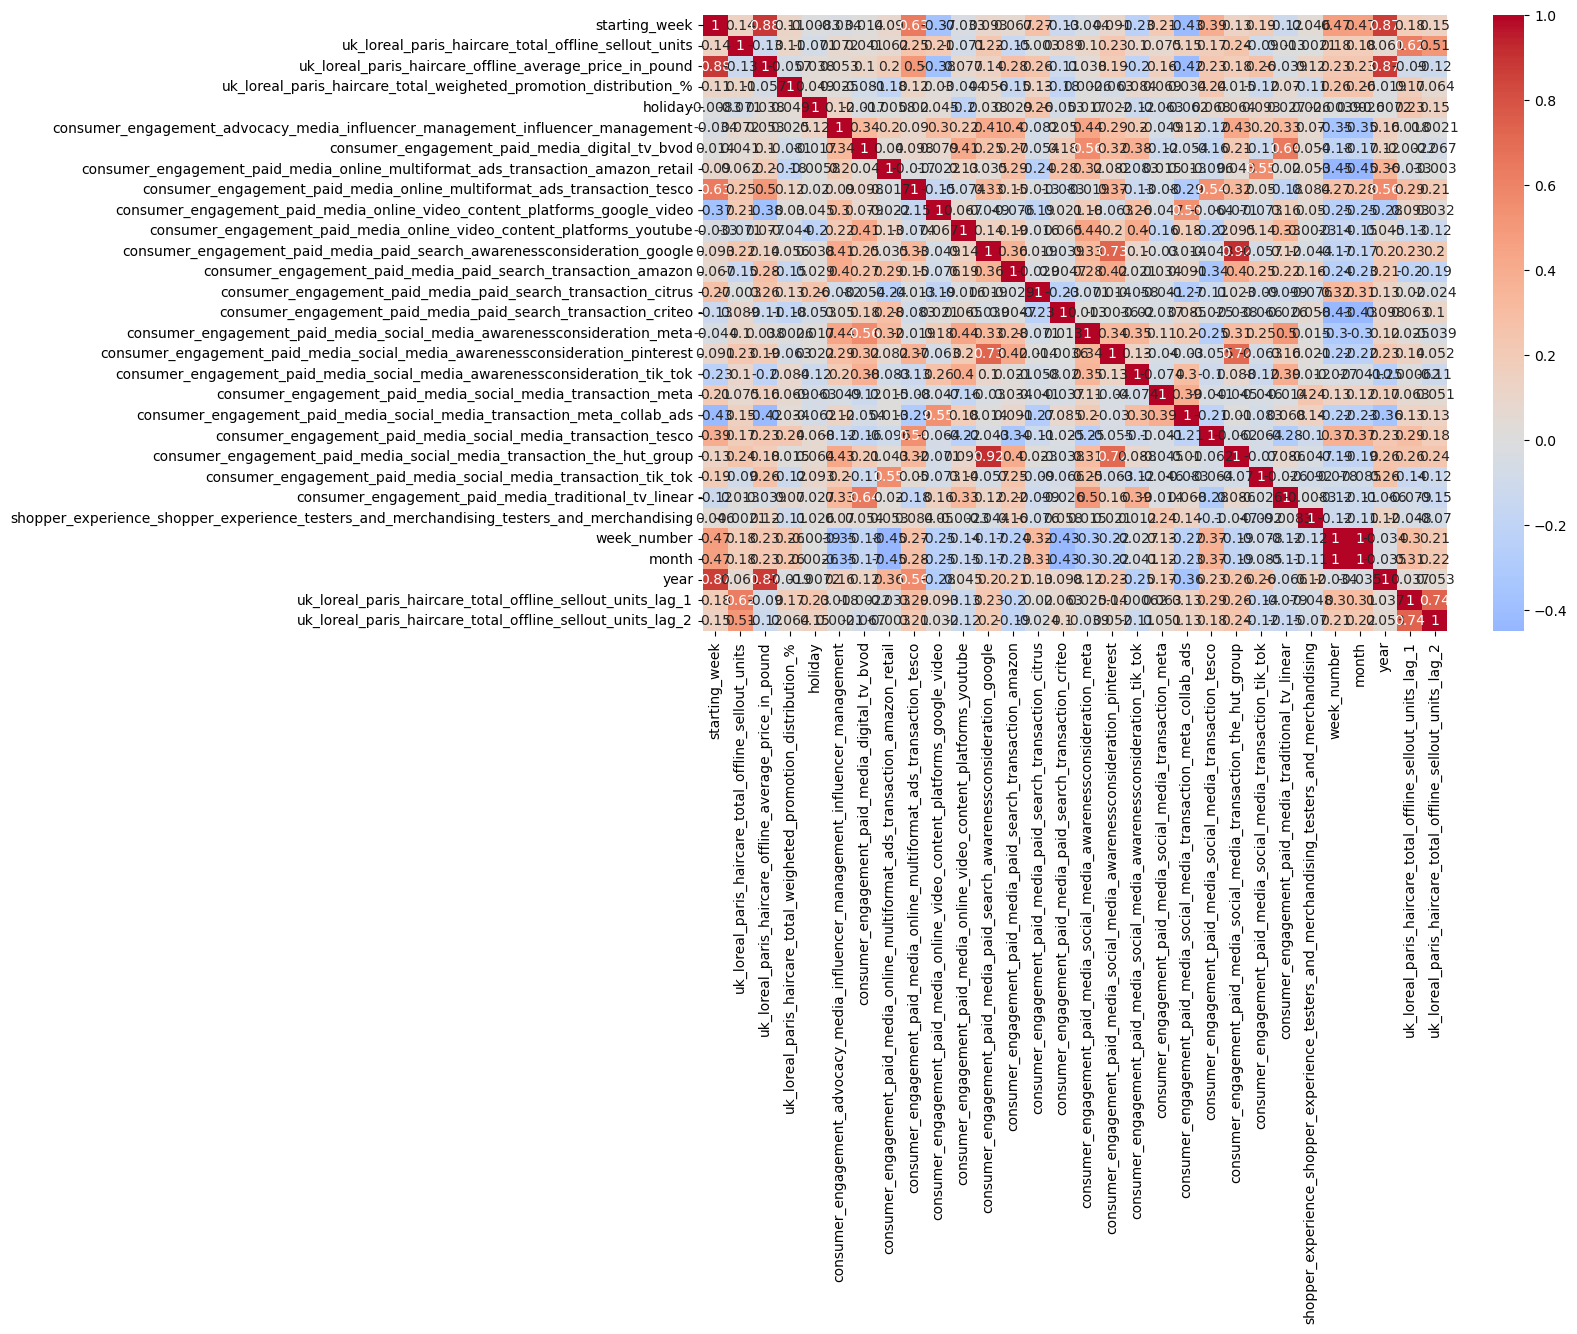

In [38]:
# Correlation matrix
correlation_matrix = lagged_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()



In [39]:
correlation_matrix

,starting_week,uk_loreal_paris_haircare_total_offline_sellout_units,uk_loreal_paris_haircare_offline_average_price_in_pound,uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%,holiday,consumer_engagement_advocacy_media_influencer_management_influencer_management,consumer_engagement_paid_media_digital_tv_bvod,consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,consumer_engagement_paid_media_online_video_content_platforms_google_video,...,consumer_engagement_paid_media_social_media_transaction_tesco,consumer_engagement_paid_media_social_media_transaction_the_hut_group,consumer_engagement_paid_media_social_media_transaction_tik_tok,consumer_engagement_paid_media_traditional_tv_linear,shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising,week_number,month,year,uk_loreal_paris_haircare_total_offline_sellout_units_lag_1,uk_loreal_paris_haircare_total_offline_sellout_units_lag_2
starting_week,1.000000,0.144803,0.884110,0.112572,-0.008268,-0.034295,0.013926,0.090241,0.632524,-0.367303,...,0.389782,0.130917,0.194052,-0.116811,0.045672,0.470555,0.467786,0.865901,0.183272,0.150864
uk_loreal_paris_haircare_total_offline_sellout_units,0.144803,1.000000,-0.130333,0.107043,-0.071010,0.072327,0.040986,0.061535,0.248990,0.207333,...,0.174438,0.243251,-0.090457,0.012696,-0.002104,0.182146,0.184059,0.060753,0.621337,0.512055
uk_loreal_paris_haircare_offline_average_price_in_pound,0.884110,-0.130333,1.000000,-0.056623,0.037988,0.053371,0.103046,0.195574,0.499931,-0.380107,...,0.226026,0.181069,0.264732,-0.039009,0.120779,0.231218,0.226728,0.870317,-0.090216,-0.121137
uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%,0.112572,0.107043,-0.056623,1.000000,0.049338,0.024899,-0.081421,-0.181598,0.117307,0.030384,...,0.235081,0.014556,-0.116378,0.069532,-0.108055,0.258246,0.256418,-0.018895,0.174062,0.063849
holiday,-0.008268,-0.071010,0.037988,0.049338,1.000000,0.123886,-0.017360,-0.005838,0.019711,0.044992,...,0.067618,0.063509,0.093106,0.027065,0.025879,-0.003887,0.002637,-0.007161,0.226567,0.150879
consumer_engagement_advocacy_media_influencer_management_influencer_management,-0.034295,0.072327,0.053371,0.024899,0.123886,1.000000,0.335354,0.201849,0.089628,0.300457,...,-0.118135,0.426980,0.204118,0.333331,0.069781,-0.349977,-0.350584,0.159558,0.017546,0.002066
consumer_engagement_paid_media_digital_tv_bvod,0.013926,0.040986,0.103046,-0.081421,-0.017360,0.335354,1.000000,0.039665,0.098252,0.079465,...,-0.162052,0.206992,-0.112523,0.644722,0.053988,-0.180626,-0.167178,0.118171,-0.002232,-0.066781
consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail,0.090241,0.061535,0.195574,-0.181598,-0.005838,0.201849,0.039665,1.000000,-0.016556,-0.021626,...,-0.096481,0.042972,0.553512,0.020143,0.053372,-0.447734,-0.448602,0.356033,-0.033252,-0.003036
consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco,0.632524,0.248990,0.499931,0.117307,0.019711,0.089628,0.098252,-0.016556,1.000000,-0.154911,...,0.541105,0.324514,0.049880,-0.181363,0.084320,0.274377,0.277219,0.560889,0.294069,0.205110
consumer_engagement_paid_media_online_video_content_platforms_google_video,-0.367303,0.207333,-0.380107,0.030384,0.044992,0.300457,0.079465,-0.021626,-0.154911,1.000000,...,-0.064172,-0.070623,-0.072874,0.155790,0.049604,-0.246674,-0.249340,-0.276189,0.092564,0.031736


# Robyn

In [41]:
import pandas as pd

from robyn.robyn import Robyn
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters, ChannelHyperparameters
from robyn.data.entities.enums import AdstockType, DependentVarType

2025-02-06 13:20:24,741 - robyn - INFO - Logging is set up to console only.
c:\Users\ameya\miniconda3\envs\default\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
features

['uk_loreal_paris_haircare_offline_average_price_in_pound',
 'uk_loreal_paris_haircare_total_weigheted_promotion_distribution_%',
 'holiday',
 'consumer_engagement_advocacy_media_influencer_management_influencer_management',
 'consumer_engagement_paid_media_digital_tv_bvod',
 'consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail',
 'consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco',
 'consumer_engagement_paid_media_online_video_content_platforms_google_video',
 'consumer_engagement_paid_media_online_video_content_platforms_youtube',
 'consumer_engagement_paid_media_paid_search_awarenessconsideration_google',
 'consumer_engagement_paid_media_paid_search_transaction_amazon',
 'consumer_engagement_paid_media_paid_search_transaction_citrus',
 'consumer_engagement_paid_media_paid_search_transaction_criteo',
 'consumer_engagement_paid_media_social_media_awarenessconsideration_meta',
 'consumer_engagement_paid_media_social_media_awarenessconsi

In [45]:
paid_media_vars = [ 'consumer_engagement_advocacy_media_influencer_management_influencer_management',
 'consumer_engagement_paid_media_digital_tv_bvod',
 'consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail',
 'consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco',
 'consumer_engagement_paid_media_online_video_content_platforms_google_video',
 'consumer_engagement_paid_media_online_video_content_platforms_youtube',
 'consumer_engagement_paid_media_paid_search_awarenessconsideration_google',
 'consumer_engagement_paid_media_paid_search_transaction_amazon',
 'consumer_engagement_paid_media_paid_search_transaction_citrus',
 'consumer_engagement_paid_media_paid_search_transaction_criteo',
 'consumer_engagement_paid_media_social_media_awarenessconsideration_meta',
 'consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest',
 'consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok',
 'consumer_engagement_paid_media_social_media_transaction_meta',
 'consumer_engagement_paid_media_social_media_transaction_meta_collab_ads',
 'consumer_engagement_paid_media_social_media_transaction_tesco',
 'consumer_engagement_paid_media_social_media_transaction_the_hut_group',
 'consumer_engagement_paid_media_social_media_transaction_tik_tok',
 'consumer_engagement_paid_media_traditional_tv_linear', 'shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising']

In [53]:
dep_var = target
dep_var_type = "revenue"
date_var = "starting_week"

context_vars = ['week_number', 'month', 'year']

In [54]:
window_start = offline_data["starting_week"].min()
window_end = offline_data["starting_week"].max()

In [55]:
mmm_data_spec = MMMData.MMMDataSpec(
    dep_var=dep_var,
    dep_var_type=dep_var_type,
    date_var=date_var,
    context_vars=context_vars,
    paid_media_vars=paid_media_vars,
    window_start=window_start,
    window_end=window_end,
)

mmm_data = MMMData(data=offline_data, mmmdata_spec=mmm_data_spec)

In [67]:
# Get UK holidays for 2022 and 2023
uk_holidays = holidays.UnitedKingdom(years=[2022, 2023])

# Create a DataFrame for the holiday data
holiday_dates = pd.DataFrame({
    'ds': [str(date) for date in uk_holidays.keys()],
    'holiday': ['UK Holiday'] * len(uk_holidays),  # You can customize this as needed
})

# Add a 'country' column with the code for the UK (GB)
holiday_dates['country'] = 'GB'  # 'GB' is the country code for the United Kingdom

# Extract the year from the 'ds' column and add it to the DataFrame
holiday_dates['year'] = pd.to_datetime(holiday_dates['ds']).dt.year

# Now, the dt_holidays DataFrame should have 'ds', 'holiday', 'country', and 'year'
holidays_data = HolidaysData(
    dt_holidays=holiday_dates,
    prophet_vars=["trend", "season", "holiday"],
    prophet_country="GB",  # Use "GB" for the United Kingdom
    prophet_signs=["default", "default", "default"],  # Let the model decide on the effect direction
)

# Example usage in your model setup
print(holidays_data.dt_holidays.head())

           ds     holiday country  year
0  2022-04-15  UK Holiday      GB  2022
1  2022-05-02  UK Holiday      GB  2022
2  2022-06-02  UK Holiday      GB  2022
3  2022-06-03  UK Holiday      GB  2022
4  2022-09-19  UK Holiday      GB  2022


In [68]:
# Define hyperparameters for each media channel
hyperparameters = Hyperparameters(
    hyperparameters={
        'consumer_engagement_advocacy_media_influencer_management_influencer_management': ChannelHyperparameters(
            alphas=[0.5, 1],
            gammas=[0.5, 1],
            thetas=[0.1, 0.3],
        ),
        'consumer_engagement_paid_media_digital_tv_bvod': ChannelHyperparameters(
            alphas=[1.5, 3],
            gammas=[0.5, 0.7],
            thetas=[0.2, 0.4],
        ),
        'consumer_engagement_paid_media_online_multiformat_ads_transaction_amazon_retail': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.3, 0.6],
            thetas=[0.1, 0.3],
        ),
        'consumer_engagement_paid_media_online_multiformat_ads_transaction_tesco': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.3, 0.6],
            thetas=[0.1, 0.3],
        ),
        'consumer_engagement_paid_media_online_video_content_platforms_google_video': ChannelHyperparameters(
            alphas=[1.5, 3],
            gammas=[0.5, 0.7],
            thetas=[0.2, 0.4],
        ),
        'consumer_engagement_paid_media_online_video_content_platforms_youtube': ChannelHyperparameters(
            alphas=[1.5, 3],
            gammas=[0.5, 0.7],
            thetas=[0.2, 0.4],
        ),
        'consumer_engagement_paid_media_paid_search_awarenessconsideration_google': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.1, 0.3],
        ),
        'consumer_engagement_paid_media_paid_search_transaction_amazon': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.1, 0.3],
        ),
        'consumer_engagement_paid_media_paid_search_transaction_citrus': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.1, 0.3],
        ),
        'consumer_engagement_paid_media_paid_search_transaction_criteo': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.1, 0.3],
        ),
        'consumer_engagement_paid_media_social_media_awarenessconsideration_meta': ChannelHyperparameters(
            alphas=[0.5, 1],
            gammas=[0.3, 0.6],
            thetas=[0, 0.3],
        ),
        'consumer_engagement_paid_media_social_media_awarenessconsideration_pinterest': ChannelHyperparameters(
            alphas=[0.5, 1],
            gammas=[0.3, 0.6],
            thetas=[0, 0.3],
        ),
        'consumer_engagement_paid_media_social_media_awarenessconsideration_tik_tok': ChannelHyperparameters(
            alphas=[0.5, 1],
            gammas=[0.3, 0.6],
            thetas=[0, 0.3],
        ),
        'consumer_engagement_paid_media_social_media_transaction_meta': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.2, 0.4],
        ),
        'consumer_engagement_paid_media_social_media_transaction_meta_collab_ads': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.2, 0.4],
        ),
        'consumer_engagement_paid_media_social_media_transaction_tesco': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.2, 0.4],
        ),
        'consumer_engagement_paid_media_social_media_transaction_the_hut_group': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.2, 0.4],
        ),
        'consumer_engagement_paid_media_social_media_transaction_tik_tok': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.2, 0.4],
        ),
        'consumer_engagement_paid_media_traditional_tv_linear': ChannelHyperparameters(
            alphas=[2, 3],
            gammas=[0.6, 0.8],
            thetas=[0.4, 0.8],
        ),
        'shopper_experience_shopper_experience_testers_and_merchandising_testers_and_merchandising': ChannelHyperparameters(
            alphas=[1, 2],
            gammas=[0.4, 0.7],
            thetas=[0.1, 0.3],
        ),
    },
    adstock=AdstockType.GEOMETRIC,  # Can change to 'weibull_cdf' if needed
    lambda_=[0, 0.5],  # Ridge regularization
    train_size=[0.5, 0.8],  # Training data proportion
)


In [69]:
robyn = Robyn(working_dir="output")
robyn.initialize(
    mmm_data=mmm_data,
    holidays_data=holidays_data,
    hyperparameters=hyperparameters,
)

INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
2025-02-06 13:43:52,280 - robyn.robyn - INFO - Initialized Robyn in output
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
2025-02-06 13:43:52,284 - robyn.robyn - INFO - Validating input data
2025-02-06 13:43:52,287 - robyn.data.validation.mmmdata_validation - INFO - Starting complete MMMData validation
2025-02-06 13:43:52,291 - robyn.data.validation.mmmdata_validation - INFO - Missing and infinite value check passed successfully
2025-02-06 13:43:52,293 - robyn.data.validation.mmmdata_validation - INFO - No-variance check passed successfully
2025-02-06 13:43:52,293 - robyn.data.validation.mmmdata_validation - INFO - Variable names validation passed successfully
2025-02-06 13:43:52,294 - robyn.data.validation.mmmdata_validation -

In [70]:
%matplotlib inline
# Run feature engineering
robyn.feature_engineering();

INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
2025-02-06 13:43:52,878 - robyn.robyn - INFO - Performing feature engineering
2025-02-06 13:43:52,881 - robyn.modeling.feature_engineering - INFO - Starting feature engineering process
2025-02-06 13:43:52,884 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
2025-02-06 13:43:52,886 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
2025-02-06 13:43:52,897 - root - ERROR - Error in feature engineering: unsupported operand type(s) for +: 'NoneType' and 'list'


TypeError: unsupported operand type(s) for +: 'NoneType' and 'list'